# INTERNSHALA PROJECT ON EVs

video Explanation link : https://drive.google.com/file/d/1y5_dJW1kTgz6NgQ2nMJBOvKlYJRkrUkq/view?usp=sharing

# Task 1: 
A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km. 
 a) Your task is to filter out EVs that meet these criteria.(2 Marks)
 b) Group them by the manufacturer (Make).(6 marks)
 c) Calculate the average battery capacity for each manufacturer. (8 Marks)

In [71]:
# Importing necessary libraries:
import pandas as pd   #For data manipulation and analysis
import numpy as np    #for Mathematical operations

#Load the excel file into the pandas dataframe
df = pd.read_excel("FEV-data-Excel.xlsx")

#Display first few rows to understand the structue
print(df.head())  #Prints first 5 rows of the dataset

#Display column names
print ("\n ----------------------------------------------------------------------------")
print(df.columns)

#Check for missing values (our focus first on : Minimal Price(PLN) , Range (WLTP) , Make , Battery Capacity(kWh))
print ("\n(FOR NULL VALUES)---------------------------------------------------------------------------")
print(df[["Minimal price (gross) [PLN]", "Range (WLTP) [km]","Make","Battery capacity [kWh]"]].isnull().sum())

                      Car full name  Make                        Model  \
0            Audi e-tron 55 quattro  Audi            e-tron 55 quattro   
1            Audi e-tron 50 quattro  Audi            e-tron 50 quattro   
2             Audi e-tron S quattro  Audi             e-tron S quattro   
3  Audi e-tron Sportback 50 quattro  Audi  e-tron Sportback 50 quattro   
4  Audi e-tron Sportback 55 quattro  Audi  e-tron Sportback 55 quattro   

   Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
0                       345700                360                  664   
1                       308400                313                  540   
2                       414900                503                  973   
3                       319700                313                  540   
4                       357000                360                  664   

        Type of brakes Drive type  Battery capacity [kWh]  Range (WLTP) [km]  \
0  disc (front + rear)        

In [72]:
# A. Filter data by budget and range which is given 

#Initialize the values given
budget_limit = 350000   #Given Budget
minimum_range = 400     #Given Range

#Lets filter the dataset based on given conditions
filtered_df = df[(df["Minimal price (gross) [PLN]"] <= budget_limit) & (df["Range (WLTP) [km]"] >= minimum_range)]

#print the filtered Data
print("\n")
print(f"EV's under {budget_limit} PLN and with at least {minimum_range} km range are: ")
print(filtered_df[["Car full name","Make","Minimal price (gross) [PLN]","Range (WLTP) [km]",]])



EV's under 350000 PLN and with at least 400 km range are: 
                        Car full name           Make  \
0              Audi e-tron 55 quattro           Audi   
8                             BMW iX3            BMW   
15        Hyundai Kona electric 64kWh        Hyundai   
18                   Kia e-Niro 64kWh            Kia   
20                   Kia e-Soul 64kWh            Kia   
22                  Mercedes-Benz EQC  Mercedes-Benz   
39  Tesla Model 3 Standard Range Plus          Tesla   
40           Tesla Model 3 Long Range          Tesla   
41          Tesla Model 3 Performance          Tesla   
47    Volkswagen ID.3 Pro Performance     Volkswagen   
48              Volkswagen ID.3 Pro S     Volkswagen   
49                Volkswagen ID.4 1st     Volkswagen   

    Minimal price (gross) [PLN]  Range (WLTP) [km]  
0                        345700                438  
8                        282900                460  
15                       178400                449 

In [73]:
# B) Grouping them by the manufacturer (Make).(6 marks)
group_by_make = filtered_df.groupby("Make")
print(group_by_make.groups.keys())   #Key Manufacturer names which we have grouped

dict_keys(['Audi', 'BMW', 'Hyundai', 'Kia', 'Mercedes-Benz', 'Tesla', 'Volkswagen'])


In [74]:
# C) Calculate the average battery capacity for each manufacturer. (8 Marks)
average_battery_capacity = group_by_make ["Battery capacity [kWh]"].mean()

average_battery_capacity_sorted = average_battery_capacity.sort_values(ascending = False)

#To display the results:
print("\n ------------------- AVG BATTERY CAPACITY by Manufacturer ----------------------")
print(average_battery_capacity_sorted)


 ------------------- AVG BATTERY CAPACITY by Manufacturer ----------------------
Make
Audi             95.000000
BMW              80.000000
Mercedes-Benz    80.000000
Volkswagen       70.666667
Tesla            68.000000
Hyundai          64.000000
Kia              64.000000
Name: Battery capacity [kWh], dtype: float64


# SUMMARY - TASK 1

1) I have Loaded the dataset.

2) Filtered EVs with price ≤ 350,000 PLN and range ≥ 400 km.

3) Grouped them by 'Make' (Manufacturer).

4) Calculated and displayed average battery capacity for each manufacturer.

# # Task 2: 
 You suspect some EVs have unusually high or low energy consumption. Find the
 outliers in the mean- Energy consumption [kWh/100 km] column.(16 Marks)

In [75]:
#Check out for the Libraries (Already imported)

#Detect Outliers

#initialize the enrgy column
energy_column = "mean - Energy consumption [kWh/100 km]"

df_clean_energy = df.dropna (subset = [energy_column])  # Drop Rows where the column value is NaN (To avoid errors)

# IQR (Interquartile Range) Method — a simple and effective technique.
#IQR = Q3 - Q1
#Lower bound = Q1 - 1.5 * IQR
#Upper bound = Q3 + 1.5 * IQR

Q1 = df_clean_energy[energy_column].quantile(0.25)
Q3 = df_clean_energy[energy_column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR  #Less strict threshold as data set is small
upper_bound = Q3 + 0.5 * IQR

outliers = df_clean_energy [((df_clean_energy[energy_column] < lower_bound) | (df_clean_energy[energy_column] > upper_bound))]

#Printing the Calculated Values
print(f"Q1 (25 percentile) : {Q1}")
print(f"Q3 (75 percentile) : {Q3}")
print(f"IQR : {IQR}")
print(f"Lower Bound : {lower_bound}")
print(f"Upper Bound : {upper_bound}")

#Printing the result
print("\n")
print(f"Total Number of Outliers in energy consumption : {len(outliers)}")
print(outliers[["Car full name", "Make" , energy_column]])

Q1 (25 percentile) : 15.6
Q3 (75 percentile) : 23.5
IQR : 7.9
Lower Bound : 11.649999999999999
Upper Bound : 27.45


Total Number of Outliers in energy consumption : 2
               Car full name           Make  \
2      Audi e-tron S quattro           Audi   
51  Mercedes-Benz EQV (long)  Mercedes-Benz   

    mean - Energy consumption [kWh/100 km]  
2                                    27.55  
51                                   28.20  


# Note:
We used a reduced IQR multiplier (0.5 instead of 1.5) to identify mild outliers. 
The standard value of 1.5 returned an empty result, indicating no extreme outliers.
Reducing the multiplier helps in highlighting potential mild anomalies in energy consumption.


C:\Users\danis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


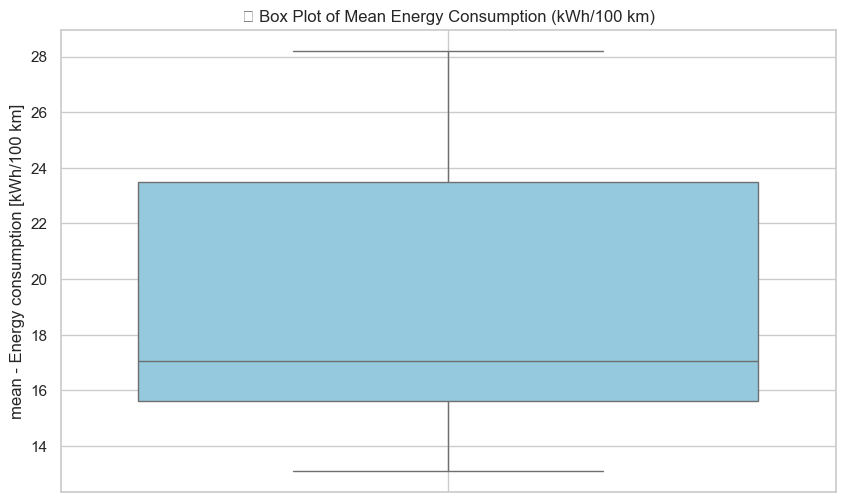

In [76]:
#Plotting box plot to visualize the outliers

import matplotlib.pyplot as plt       # For plotting
import seaborn as sns                # For statistical plots

# Plot the box plot
plt.figure(figsize=(10, 6))  # Set plot size
sns.boxplot(y=df_clean_energy["mean - Energy consumption [kWh/100 km]"],color="skyblue")
plt.title("📦 Box Plot of Mean Energy Consumption (kWh/100 km)")
plt.grid(True)
plt.show()


 # Task 3:
 Your manager wants to know if there's a strong relationship between battery capacity and range.
 a) Create a suitable plot to visualize.(8 Marks)
 b) Highlight any insights.(8 Marks)

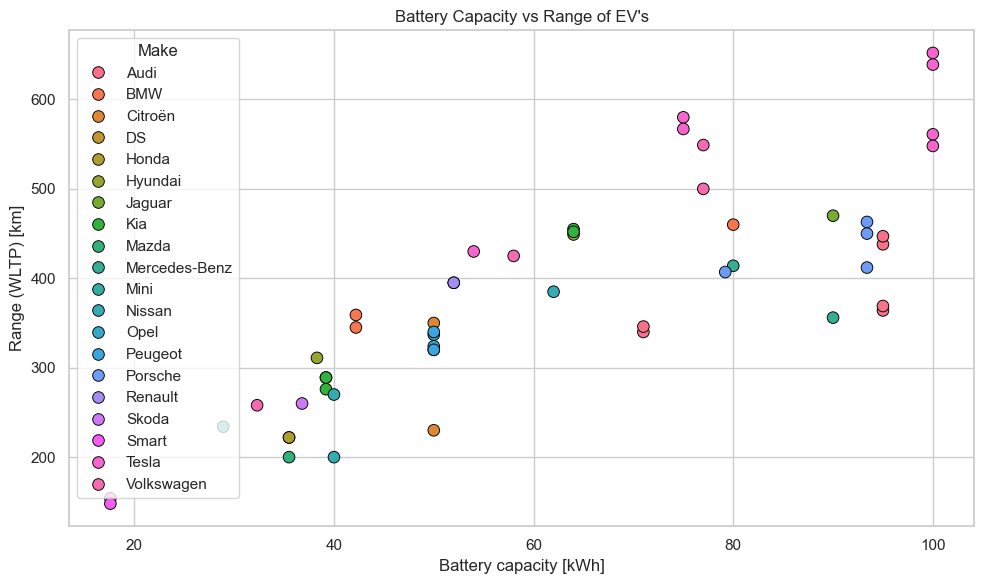

In [77]:
# **A**  To Understand relationship between Battery Capacity and Range we'll use Scatter plot
#Libraries required are 'matplotlib.pyplot' and 'seaborn' (If not imported)
import matplotlib.pyplot as plt       # For plotting
import seaborn as sns                # For statistical plots

battery_column = "Battery capacity [kWh]"
range_column = "Range (WLTP) [km]"

#Drop rows with missing values for better plotting
df_battery_range = df.dropna(subset = [battery_column,range_column])

#Setting up plot size and Fig size
sns.set (style = "whitegrid")
plt.figure(figsize = (10,6))

#Creating Scatter Plot
sns.scatterplot(data = df_battery_range , x = battery_column, y = range_column, hue = "Make" , s = 70 , edgecolor = "black")
plt.title("Battery Capacity vs Range of EV's")
plt.xlabel("Battery capacity [kWh]")
plt.ylabel ("Range (WLTP) [km]")
plt.grid(True)

plt.tight_layout()
plt.show()

# 3.B 📊 Insight from Battery Capacity vs Range Plot

- There is a clear positive correlation between battery capacity and range — EVs with larger batteries tend to offer more driving range.
- Manufacturers like Tesla, Porsche and Mercedes-Benz demonstrate higher efficiency, delivering long ranges even with moderate batteries.
- Brands like Citroën and Opel cluster in the lower-range zone, indicating potential inefficiencies.
- Some EVs are outliers, either underperforming or overperforming relative to battery size.
- Most EVs fall within the 40–60 kWh / 250–450 km range, showing current market concentrated.


# Task 4
Build an EV recommendation class. The class should allow users to input their budget, desired range, and battery capacity. The class should then return the top three EVs matching their criteria. (8+8 Marks)

In [78]:
from ev_recommender import EVRecommender

recommender = EVRecommender(df)

try:
    user_budget = int(input("Enter your budget: "))
    user_range = int(input ("Enter your desired minimum range in kms: "))
    user_battery = float(input("Enter your desired minimum battery capacity in kWh: "))

    recommended_cars = recommender.recommend( budget = user_budget, min_range = user_range , min_battery = user_battery)

    if not recommended_cars.empty:
        print("\n Top 3 Recommended EVs Based on your preference: ")
        print(recommended_cars.to_string(index = False))
    else:
        print("\n No EVs match your criteria, try adjusting the values. ")

except ValueError:
    print("Please enter valid numbers only. ")

Enter your budget:  184000
Enter your desired minimum range in kms:  300
Enter your desired minimum battery capacity in kWh:  50



 Top 3 Recommended EVs Based on your preference: 
        Car full name       Make  Minimal price (gross) [PLN]  Range (WLTP) [km]  Battery capacity [kWh]
Volkswagen ID.3 Pro S Volkswagen                       179990                549                    77.0
     Kia e-Niro 64kWh        Kia                       167990                455                    64.0
     Kia e-Soul 64kWh        Kia                       160990                452                    64.0


# Summary:
Initially, results were sorted by driving range. We've updated the logic to sort by price, 
so the user gets premium EVs that are closest to their budget — while still meeting range and battery capacity preferences.


# Task 5:
Inferential Statistics– Hypothesis Testing: Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. Tesla and Audi. What insights can you draw from the test results? Recommendations and Conclusion: Provide actionable insights based on your analysis. (Conduct a two sample t-test using ttest_ind from scipy.stats module) (16 Marks)

In [79]:
from scipy.stats import ttest_ind

engine_power_column = "Engine power [KM]"

tesla_power = df[df["Make"] == "Tesla"] [engine_power_column].dropna()
audi_power = df[df["Make"] == "Audi"] [engine_power_column].dropna()

t_stat, p_value = ttest_ind(tesla_power,audi_power, equal_var = False)

print(f"T-Statistic: {t_stat}")
print(f"P value: {p_value}")

alpha = 0.05 # Significance Level

if p_value < alpha:
    print("Reject Null Hypothesis : There is a significant difference in average engine power")
else:
    print("Null Hypothesis is Correct : There is no significant difference in average engine power")

T-Statistic: 1.7939951827297178
P value: 0.10684105068839565
Null Hypothesis is Correct : There is no significant difference in average engine power


# Conclusion:
Based on Statistical analysis using a two-sample t-test comparing the engine power of tesla and audi electric vehicles:
1) There is no significant difference in the average engine power of tesla and Audi EVs
    (p-value = 0.1068 > 0.05).
3) Although Tesla may appear slightly more powerful on average, the observed difference is not strong enough to conclude it is meaningful.
4) From an engineering standpoint, engine performance is comparable between two brands in this dataset.


# Recommendations:
1) Focus on brand-specific strenghts rather than engine specs.
2) Target Demographic interests (Unique brand marketing)

### For Customers:
1) Engine power is not aa major differentiator, should consider other key metrics like (Range , Battery Capacity, Charging Speed)
2) Tesla and Audi can be considered equally strong contendors if engine power is priority

### For Manufacturers:
1) Tesla : Can highlight features like auto pilot, range and software since engine power is not a clear differentiator.
2) Audi : Should highlight features like Luxury, Comfort and safety meanwhile focusing on the battery efficiency as well. (which can help differentiate against Tesla's performance).

